# AWS and Intel Hackathon for Good: Notebook de Preprocesamiento del Dataset 1

Arturo Pinar

Alejandro Pinar

Alberto Jiménez

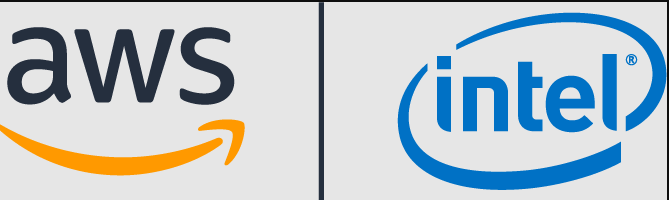

# 1. Lectura del dataset original

El dataset original puede ser descargado desde la siguiente URL: 
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=38ed95bac1ba6610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

El **objetivo** de este notebook es el preprocesamiento del dataset 1 utilizado para este proyecto. Este dataset, proporcionado por la Comunidad de Madrid, contiene información acerca de la localización de una muestra de los contenedores de reciclaje de la ciudad de Madrid. 

El primer paso realizado es la lecture del dataset utilizando la librería Pandas.

In [1]:
import pandas as pd

dataset = pd.read_csv("dataset1.csv", sep = ";", encoding = "latin-1")
dataset

,Código Interno del Situad,Tipo Contenedor,Modelo,Descripcion Modelo,Cantidad,Lote,Distrito,Barrio,Tipo Vía,Nombre,Número,COORDENADA X,COORDENADA Y,LONGITUD,LATITUD,DIRECCION
0,168755,ENVASES,NaN,Env 3200 CL,1.0,1,CENTRO,NaN,PLAZA,SALESAS,9.0,"441062,99","4475052,45",-3.694768,40.424017,"PLAZA SALESAS, 9"
1,168755,VIDRIO,NaN,V 2200 CL VACRI,1.0,1,CENTRO,NaN,PLAZA,SALESAS,9.0,"441062,99","4475052,45",-3.694768,40.424017,"PLAZA SALESAS, 9"
2,168753,VIDRIO,NaN,V 2200 CL,1.0,1,CENTRO,NaN,CALLE,MEJIA LEQUERICA,20.0,"440680,69","4475502,55",-3.699317,40.428045,"CALLE MEJIA LEQUERICA, 20"
3,170313,RESTO,NaN,Res 800,1.0,1,FUENCARRAL-EL PARDO,NaN,CALLE,ISLA DE JAVA,55.0,"441852,02","4482612,15",-3.686160,40.492174,"CALLE ISLA DE JAVA, 55"
4,169874,ENVASES,NaN,Env 800,1.0,1,FUENCARRAL-EL PARDO,NaN,AVENIDA,CARDENAL HERRERA ORIA,271.0,"438643,32","4481240,57",-3.723888,40.479587,"AVENIDA CARDENAL HERRERA ORIA, 271"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49680,183016,PAPEL-CARTON,NaN,PC 3000 CAMPANA PE,NaN,3,CARABANCHEL,NaN,Calle,de Cazalegas,5.0,"438340,27","4469648,63",-3.726339,40.375140,"Calle de Cazalegas, 5"
49681,180407,ORGANICA,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,de Serafín Gómez,5.0,"439109,2","4471116,07",-3.717422,40.388416,"Calle de Serafín Gómez, 5"
49682,179959,ORGANICA,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,de Carlos Paino,16.0,"436787,64","4470927,13",-3.744754,40.386541,"Calle de Carlos Paino, 16"
49683,181957,ORGANICA,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,del General García de la Herranz,1.0,"438223,05","4471250,31",-3.727875,40.389560,"Calle del General García de la Herranz, 1"


# 2. Preprocesamiento de Dataset original

## 2.1. Codificación Numérica de los tipos de contenedores

En primer lugar analizamos las distintas clases de contenedores que contiene el dataset. Para ello obtenemos una lista de los distintos valores únicos que puede tomar la variable "Tipo Contenedor". 

In [2]:
dataset["Tipo Contenedor"].unique()

array(['ENVASES', 'VIDRIO', 'RESTO', 'ORGANICA', 'PAPEL-CARTON'],
      dtype=object)

Como los resultados del modelo de Machine Learning son numéricos necesitamos codificar los distintos tipos de contenedores a valores numéricos. Los distintos tipos de contenedores representados en el dataset son: 

- envases = Contenedor amarillo (plasticos, envases y metal)  
- vidrio = Contenedor verde (vidrio) 
- resto = Contenedor gris (restos) 
- organica = contenedor (marron) 
- papel-carton = Contenedor azul (papel y carton)


Por lo tanto la codificación numérica utilizada es: 

- 1 = envases 
- 2 = vidrio 
- 3 = resto
- 4 = organica
- 5 = papel-carton

In [3]:
containers = dataset["Tipo Contenedor"]

i = 0
for i in range(len(containers)):
    if containers[i] == "ENVASES":
        containers[i] = 1
    if containers[i] == "VIDRIO":
        containers[i] = 2
    if containers[i] == "RESTO":
        containers[i] = 3
    if containers[i] == "ORGANICA":
        containers[i] = 4
    if containers[i] == "PAPEL-CARTON":
        containers[i] = 5
        
        

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9528/2587100185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  containers[i] = 1
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9528/2587100185.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  containers[i] = 2
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9528/2587100185.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  containers[i] = 3


In [4]:
containers.unique()

array([1, 2, 3, 4, 5], dtype=object)

In [5]:
dataset = dataset.drop(["Tipo Contenedor"], axis = 1)

In [6]:
dataset.insert(1, "Tipo Contenedor", containers)

In [7]:
dataset

,Código Interno del Situad,Tipo Contenedor,Modelo,Descripcion Modelo,Cantidad,Lote,Distrito,Barrio,Tipo Vía,Nombre,Número,COORDENADA X,COORDENADA Y,LONGITUD,LATITUD,DIRECCION
0,168755,1,NaN,Env 3200 CL,1.0,1,CENTRO,NaN,PLAZA,SALESAS,9.0,"441062,99","4475052,45",-3.694768,40.424017,"PLAZA SALESAS, 9"
1,168755,2,NaN,V 2200 CL VACRI,1.0,1,CENTRO,NaN,PLAZA,SALESAS,9.0,"441062,99","4475052,45",-3.694768,40.424017,"PLAZA SALESAS, 9"
2,168753,2,NaN,V 2200 CL,1.0,1,CENTRO,NaN,CALLE,MEJIA LEQUERICA,20.0,"440680,69","4475502,55",-3.699317,40.428045,"CALLE MEJIA LEQUERICA, 20"
3,170313,3,NaN,Res 800,1.0,1,FUENCARRAL-EL PARDO,NaN,CALLE,ISLA DE JAVA,55.0,"441852,02","4482612,15",-3.686160,40.492174,"CALLE ISLA DE JAVA, 55"
4,169874,1,NaN,Env 800,1.0,1,FUENCARRAL-EL PARDO,NaN,AVENIDA,CARDENAL HERRERA ORIA,271.0,"438643,32","4481240,57",-3.723888,40.479587,"AVENIDA CARDENAL HERRERA ORIA, 271"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49680,183016,5,NaN,PC 3000 CAMPANA PE,NaN,3,CARABANCHEL,NaN,Calle,de Cazalegas,5.0,"438340,27","4469648,63",-3.726339,40.375140,"Calle de Cazalegas, 5"
49681,180407,4,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,de Serafín Gómez,5.0,"439109,2","4471116,07",-3.717422,40.388416,"Calle de Serafín Gómez, 5"
49682,179959,4,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,de Carlos Paino,16.0,"436787,64","4470927,13",-3.744754,40.386541,"Calle de Carlos Paino, 16"
49683,181957,4,NaN,O 3200 CL,NaN,3,CARABANCHEL,NaN,Calle,del General García de la Herranz,1.0,"438223,05","4471250,31",-3.727875,40.389560,"Calle del General García de la Herranz, 1"


El siguiente paso es procesar los valores nulos encontrados en las distintas variables. Un valor nulo es todo aquel que no poseé un valor con significado en el dataset, por ejemplo "NaN".  

## 2.2. Procesamiento de valores nulos

In [8]:
dataset.isna().sum()

Código Interno del Situad        0
Tipo Contenedor                  0
Modelo                       35562
Descripcion Modelo               0
Cantidad                     15099
Lote                             0
Distrito                         0
Barrio                       35562
Tipo Vía                        30
Nombre                          30
Número                        2980
COORDENADA X                     0
COORDENADA Y                     0
LONGITUD                         0
LATITUD                          0
DIRECCION                        0
dtype: int64

Analizando los valores nulos se puede observar que las variables que presentan mayor número de valores nulos son: "Modelo", "Cantidad", "Barrio", "Número". 

Por otro lado, las variables "Tipo Vía", "Nombre" presentan una relación muy pequeña de valores nulos respecto al total de filas (30 nulos sobre 49685 filas) por lo que podemos eliminar las filas que presentan esos valores nulos. 

In [9]:
columns_na = ["Tipo Vía", "Nombre"]

for c in columns_na:
    removing_indexes = dataset.loc[pd.isna(dataset[c]), :].index.values
    print("filas a suprimir para columna: ", c, "son: ", removing_indexes)
    dataset = dataset.drop(removing_indexes)



filas a suprimir para columna:  Tipo Vía son:  [34082 35343 35454 37210 37293 37491 37492 37493 37494 37495 37500 37501
 37502 37503 37504 37505 37507 37509 38711 38913 39180 40022 41610 41930
 41945 43947 45238 45612 45622 47246]
filas a suprimir para columna:  Nombre son:  []


In [10]:
dataset.isna().sum()

Código Interno del Situad        0
Tipo Contenedor                  0
Modelo                       35532
Descripcion Modelo               0
Cantidad                     15070
Lote                             0
Distrito                         0
Barrio                       35532
Tipo Vía                         0
Nombre                           0
Número                        2950
COORDENADA X                     0
COORDENADA Y                     0
LONGITUD                         0
LATITUD                          0
DIRECCION                        0
dtype: int64

Por otro lado, para la variable "Número" existe una proporción mayor de valores nulos (2950 sobre 49865) lo que constituye aproximadamente el 6% del total de filas. Como la inferencia de los posibles números donde están alojados los contenedores resultaría un proceso muy complicado y exigente, hemos decidido eliminar las 2950 filas nulas.    

In [11]:
columns_na = ["Número"]

for c in columns_na:
    removing_indexes = dataset.loc[pd.isna(dataset[c]), :].index.values
    print("filas a suprimir para columna: ", c, "son: ", removing_indexes)
    dataset = dataset.drop(removing_indexes)



filas a suprimir para columna:  Número son:  [33970 33972 33991 ... 49674 49676 49677]


In [12]:
dataset.isna().sum()

Código Interno del Situad        0
Tipo Contenedor                  0
Modelo                       32582
Descripcion Modelo               0
Cantidad                     12249
Lote                             0
Distrito                         0
Barrio                       32582
Tipo Vía                         0
Nombre                           0
Número                           0
COORDENADA X                     0
COORDENADA Y                     0
LONGITUD                         0
LATITUD                          0
DIRECCION                        0
dtype: int64

Las variables con valores nulos restantes tienen una proporción demasiado grande como para poder eliminar sus filas, para eliminar estos valores nulos hace falta eliminar las variables por completo. Leyendo la descripcion del dataset que se encuentra en https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/LimpiezaResiduos/Ficheros/Estructura_DS_Contenedores_varios.pdf podemos concluir que: 

1. La variable "Modelo" no es importante para nuestro objetivo puesto que solo indica la coficación propia del contenedor y para nuestro objetivo es suficiente con conocer el tipo de contenedor (variable "Tipo Contenedor"). Por lo tanto, puede ser eliminada. 
2. La variable "Cantidad" tampoco es importante para nuestro objetivo ya que indica el número de contenedores en el situado. Para nuestro objetivo solo necesitamos saber la localización del contenedor. Por lo tanto, también puede ser eliminada. 
3. La variable "Barrio" indica el código del barrio donde esta situado el contenedor. Podría ser importante si para nuestro objetivo indicasemos el barrio donde el contenedor se sitúa, sin embargo, como lo que hacemos es geolocalizar el contenedor, utilizando las variables "CoordenadaX" y "CoordenadaY" es suficiente para localizar el contenedor y la variable puede ser eliminada. 

In [13]:
dataset = dataset.drop(["Modelo", "Cantidad", "Barrio"], axis = 1)

In [14]:
dataset.isna().sum()

Código Interno del Situad    0
Tipo Contenedor              0
Descripcion Modelo           0
Lote                         0
Distrito                     0
Tipo Vía                     0
Nombre                       0
Número                       0
COORDENADA X                 0
COORDENADA Y                 0
LONGITUD                     0
LATITUD                      0
DIRECCION                    0
dtype: int64

Tras realizar los pasos anteriores todos los valores nulos son suprimidos y por lo tanto considerando que el dataset no será utilizado con fines de Machine Learning, el procesamiento puede ser dado por finalizado. Finalmente, el dataset es exportado en formato CSV con el nombre de "dataset1_final.csv" 

In [15]:
path = "dataset1_final.csv"
dataset.to_csv(path, index = False)